# <center> PROCESAMIENTO DIGITAL DE SEÑALES DE AUDIO</center>
## <center> Complex Cepstrum - Phase unwrap</center>      

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import scipy
scipy.__version__

'1.8.0'

In [4]:
from scipy import signal

### Introducción

#### Descripción

En este ejercicio se estudia el desdoblamiento de fase (phase unwrap) de la transformada de Fourier de una señal real. Habitualmente se utiliza el valor principal para calcular el ángulo de un número complejo, entre $\pm\pi$. Para el cálculo del cepstrum complejo es necesario tomar el logaritmo del espectro de la señal. Debido a la ambigüedad de la fase, el logaritmo no produce una función continua de la fase y con simertría impar. Por lo tanto, si no se tiene la precaución de desdoblar la fase correctamente (lo que también involucra eliminar un componente lineal), el resultado del cepstrum complejo no es una señal real como debería. 


### Cómo correr el notebook
Se puede bajar y correr el notebook de forma local en una computadora.

O también se puede correr en Google Colab usando el siguiente enlace. 

<table align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/mrocamora/audio-dsp/blob/main/notebooks/audioDSP-phase_unwrap_example.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

### Parte 1 

#### Generación de la señal de trabajo

#### Parte 1.1 

A continuación se diseña un filtro pasabanda elíptico. Usaremos su respuesta al impulso como señal de trabajo en el ejercicio.

Analice el código y responda las siguientes preguntas. 

1. ¿Por qué se trunca su respuesta al impulso?
2. ¿Es un filtro de fase lineal?

In [5]:
# filter parameters
thetac = np.pi/2
M = 15
# critical frequencies of the transition band (normalized to 0-1)
Wn = [thetac/np.pi/3, (3/2)*thetac/np.pi]
# frequency response
ntheta = 2048
theta = np.linspace(0, np.pi, int(ntheta/2+1))

# build the elliptic filter and get the coefficients
b, a = signal.ellip(4, 0.1, 30, Wn, 'bandstop')

# get the impulse response
delta = np.zeros(100)
delta[0] = 1
h = signal.lfilter(b, a, delta)

# truncated and windowed impulse response
win = signal.windows.hann(2*M)
h = h[:M] * win[M:]

# compute the frequency response of the digital filter
w, H = signal.freqz(h, a=1, worN=ntheta, whole=True)

#### Parte 1.2 

Analice su respuesta en frecuencia a partir de las gráficas de magnitud y fase. Responda las siguientes preguntas. 

1. ¿Qué tipo de simetría tiene la respuesta de magnitud? ¿Qué tipo de simetría tiene la respuesta de fase?
2. ¿A qué se debe que la respuesta en frecuencia del filtro tenga este tipo de simetría?
3. ¿A qué se deben los saltos abruptos entre $\pm \pi$ en la respuesta de fase?

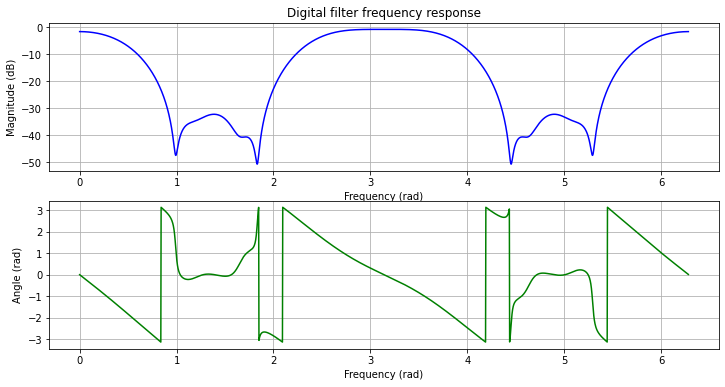

In [15]:
# magnitude response 
magH = np.abs(H)
# phase response
phaseH = np.angle(H);

# plot the frequency response
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(magH), 'b')
ax1.set_ylabel('Magnitude (dB)')
ax1.set_xlabel('Frequency (rad)')
ax1.grid()

ax2 = plt.subplot(2, 1, 2)
ax2.plot(w, phaseH, 'g')
ax2.set_ylabel('Angle (rad)')
ax2.set_xlabel('Frequency (rad)')
ax2.grid()


### Parte 2

#### Consideraciones sobre el logaritmo complejo

El cepstrum complejo puede calcularse empleando la transformada de Fourier de Tiempo Discreto (DTFT),

$$\hat{x}[n]=\frac{1}{2\pi}\int_{-\pi}^{\pi}\log(X(e^{j\omega}))e^{j\omega n}d\omega.$$

El cálculo del cepstrum complejo involucra el cálculo del logaritmo de una función compleja, $X(e^{j\omega})$, lo que corresponde a

$$
\begin{split}
	 \log X(e^{j\omega}) &= \log\left(|X(e^{j\omega})|e^{j\angle X(e^{j\omega})}\right)\\
	   &= \log\left(|X(e^{j\omega})|\right)+j\angle X(e^{j\omega}) 
\end{split}
$$

Como se observó en la parte anterior, si $x[n]$ es real, $X(e^{j\omega})$ es una función **hermítica**,
 - $|X(e^{j\omega})|$ es par $\Rightarrow \operatorname{Re}\lbrace\log X(e^{j\omega})\rbrace=\log\left(|X(e^{j\omega})|\right)$ es par
 - $\angle X(e^{j\omega})$ es impar $\Rightarrow \operatorname{Im}\lbrace\log X(e^{j\omega})\rbrace=\angle X(e^{j\omega})$ es impar
 
De lo anterior resulta que $\log X(e^{j\omega})$ también es **hermítica**. 

#### Parte 2.1 

En base a lo anterior, responda las siguientes preguntas. 

**2.1.** ¿El cepstrum complejo de una secuencia real es una secuencia real o compleja? ¿Por qué?

#### Parte 2.2


Para que el sistema característico transforme la convolución en suma, se tiene que cumplir que si $X(e^{j\omega})=X_1(e^{j\omega})X_2(e^{j\omega})$,
		 
$$\log X(e^{j\omega})=\log X_1(e^{j\omega})X_2(e^{j\omega})=\log X_1(e^{j\omega})+ \log X_2(e^{j\omega})$$.
		 
Equivalentemente, se tiene que cumplir que
$$ \begin{split}
	\log|X_1(e^{j\omega})X_2(e^{j\omega})| &= \log|X_1(e^{j\omega})|+ \log|X_2(e^{j\omega})|\\
	\angle X_1(e^{j\omega})X_2(e^{j\omega}) &= \angle X_1(e^{j\omega}) + \angle X_2(e^{j\omega}). 
	\end{split}
$$

En base a lo anterior, responda las siguientes preguntas. 

**2.2.** ¿Qué dificultades puede plantear la ambigüedad de fase que se analizó en la parte **1.2**?

### Parte 3

#### Desdoblamiento de fase

La igualdad en la ecuación de la fase de la parte anterior no necesariamente se cumple dada la ambigüedad en la fase de un número complejo, 

$$\angle X(e^{j\omega}) = \textrm{PV}\left(\angle X(e^{j\omega})\right)+2k\pi,\;\;\;\forall k\in\mathbb{N},$$

con $\textrm{PV}\left(\angle X(e^{j\omega})\right)\in[-\pi,\pi].$

La solución es forzar continuidad en la fase de $X(e^{j\omega})$ (desdoblamiento de fase), es decir, elegir  $k(\omega)\in \mathbb{N}$ tal que 
$$\angle X(e^{j\omega}) = \textrm{PV}\left(\angle X(e^{j\omega})\right)+2k(\omega)\pi$$
sea contínua, y de ese modo se cumpla que $\angle X_1(e^{j\omega})X_2(e^{j\omega}) = \angle X_1(e^{j\omega}) + \angle X_2(e^{j\omega}).$

#### Parte 3.1

Complete el siguiente código para calcular el desdoblamiento de fase (usando una función de `numpy`).

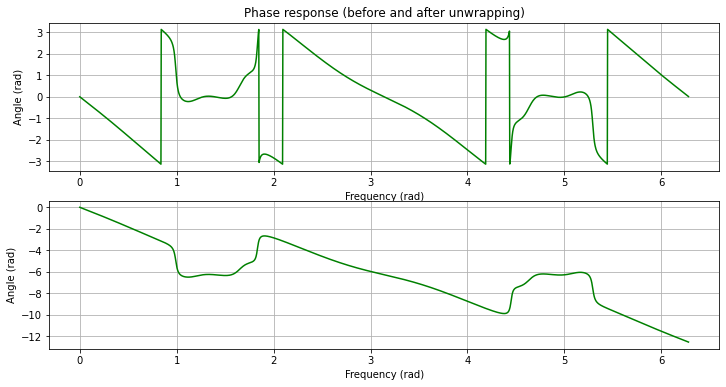

In [17]:
# phase response
phaseH = np.angle(H)
# phase unwraped
phaseH_unw1 = np.unwrap(phaseH)

# plot the frequency response
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Phase response (before and after unwrapping)')
ax1.plot(w, phaseH, 'g')
ax1.set_ylabel('Angle (rad)')
ax1.set_xlabel('Frequency (rad)')
ax1.grid()

ax2 = plt.subplot(2, 1, 2)
ax2.plot(w, phaseH_unw1, 'g')
ax2.set_ylabel('Angle (rad)')
ax2.set_xlabel('Frequency (rad)')
ax2.grid()


### Parte 4

#### Eliminación de componente lineal

Aún tenemos un problema por resolver. 

Si $x[n]$ es real, 
 - $\log X(e^{j\omega})$ debe ser una función hermítica:
     - $\log |X(e^{j\omega})|$ par: lo es por ser $|X(e^{j\omega})|$ par
     - $\angle X(e^{j\omega})$ impar: puede no serlo por el desdoblamiento de fase
 - $\log |X(e^{j0})|$ y $\log |X(e^{j\pi})|$ reales
     - $\angle X(e^{j0})=\angle X(e^{j\pi})=0$: puede no ser asi por el desdoblamiento de fase

La solución es eliminar un componente lineal de la fase:
    $$ \angle X(e^{j\omega}) - r\omega,\;\;\textrm{con }r=\frac{\angle X(e^{j\pi})}{\pi}\in\mathbb{N}$$
    
Es importante nota que la eliminación de componente lineal corresponde a
$$x[n-r] \overset{\mathcal{F}}{\longleftrightarrow}X(e^{j\omega})e^{-j\omega r}$$
por lo que se está calculando el cepstrum de $x[n-r]$ y no de $x[n]$.

#### Parte 4.1

Complete el siguiente código para eliminar el componente lineal en el procedimiento de desdoblamiento de fase.

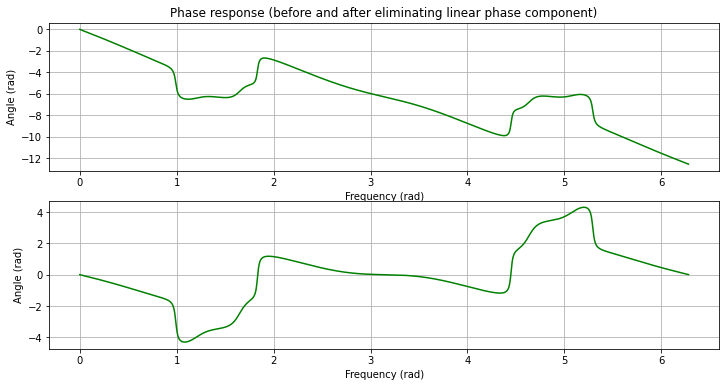

In [21]:
# phase response
phaseH = np.angle(H)
# phase unwraped
phaseH_unw1 = np.unwrap(phaseH)

# === elimination of the linear phase component

# index of the phase value at pi
ind_pi = int(np.floor((ntheta+1)/2))

# compute the linear phase factor
r = phaseH_unw1[ind_pi]//np.pi

# compute the linear phase component
ph_lin_component = r * np.pi * np.arange(ntheta) / ind_pi

# substract the linear phase component
phaseH_unw2 = phaseH_unw1 - ph_lin_component; 

# check that phase at 0 and pi frequency is 0
assert phaseH_unw2[0] == 0, "Phase value at zero is not 0"
assert phaseH_unw2[ind_pi] == 0, "Phase value at pi is not 0"

# plot the frequency response
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2, 1, 1)
ax1.set_title('Phase response (before and after eliminating linear phase component)')
ax1.plot(w, phaseH_unw1, 'g')
ax1.set_ylabel('Angle (rad)')
ax1.set_xlabel('Frequency (rad)')
ax1.grid()

ax2 = plt.subplot(2, 1, 2)
ax2.plot(w, phaseH_unw2, 'g')
ax2.set_ylabel('Angle (rad)')
ax2.set_xlabel('Frequency (rad)')
ax2.grid()
